In [1]:
from skgarden import MondrianForestClassifier
from sklearn import datasets, cross_validation
import numpy as np
import pandas as pd


C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv('./input/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset=dataset.fillna(method='ffill')
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [3]:
#2006년 High 값
training_set=dataset[:'2016'].iloc[:,0:2].values  
test_set=dataset['2017':].iloc[:,0:2].values

In [4]:
X_train=dataset[:'2016'].iloc[:,0:1].values  
y_train=dataset[:'2016'].iloc[:,1:2].values  
X_test=dataset[:'2017'].iloc[:,0:1].values  
y_test=dataset[:'2017'].iloc[:,1:2].values  

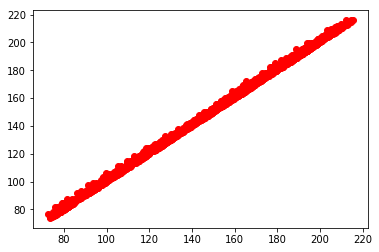

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train.ravel(), y_train, "ro")
plt.show()

In [13]:
from skgarden import MondrianForestRegressor
mfr=MondrianForestRegressor(random_state=1,max_depth=5)
mfr.fit(X_train,y_train)
y_pred,y_std=mtr.predict(X_test,return_std=True)

C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
y_pred

array([ 85.82233,  85.82233,  85.82233, ..., 156.57384, 156.57384,
       156.57384], dtype=float32)

In [8]:
y_test

array([[ 82.55],
       [ 82.5 ],
       [ 82.9 ],
       ...,
       [153.18],
       [154.12],
       [154.72]])

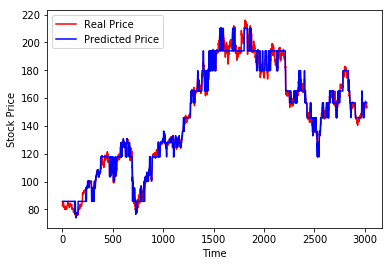

In [14]:
import matplotlib.pyplot as plt
plt.plot(y_test,color='red',label='Real Price')
plt.plot(y_pred,color='blue',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [15]:
mfr.score(y_test,y_pred)

0.9734093989551073